# Data wrangling WeRateDogs

## Table of Contents
- [Introduction](#intro)
- [Gathering data](#gather)
- [Assessing data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Cleaning data](#clean)
- [Storing, Analyzing, and Visualizing](#storing)
   - [Insight one & visualization](#one)
   - [Insight two](#two)
   - [Insight three & visualization](#three)
   - [Insight four & visualization](#four)

## Introduction


The purpose of this project to analyze the database given by the WeRateDogs account  which is a Twitter account   which rates the dogs , These ratings almost always have a denominator of 10.
The numerators, always greater than 10. 11/10, 12/10, 13/10, etc. Because "they're good dogs Brent." 


## Gathering data

1-Twitter archive file: download this file manually by clicking the following link: twitter_archive_enhanced.csv

2-The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3-Twitter API & JSON: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count

In [157]:
#import all needed libraries
import pandas as pd
import numpy as np
import requests
import json
import glob
import matplotlib.pyplot as plt
%matplotlib inline

## Twitter_archieve file

In [158]:
#reading csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [159]:
#check twitter_archive file
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## image_predictions file

In [138]:
#URL downloaded programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv' , mode='wb') as file:
    file.write(response.content)

In [160]:
#check file
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Twitter_json file

In [161]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json (2).txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
Twitter_json = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])


In [162]:
#check file
Twitter_json.head(2)

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"


## Assess


In [163]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [164]:
twitter_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1930,674038233588723717,NaN,NaN,2015-12-08 01:30:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaiya. She's an aspiring shoe model. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674038233...,12,10,Kaiya,None,None,pupper,None
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1645,683849932751646720,NaN,NaN,2016-01-04 03:18:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,None,None,None,None
1288,708349470027751425,NaN,NaN,2016-03-11 17:50:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is River. He's changing the trumpet game....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708349470...,11,10,River,None,None,None,None
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Skittle. He's trying to communicate. 1...,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,None,None,None,None
1276,709158332880297985,NaN,NaN,2016-03-13 23:24:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rodney. He's a Ukranian Boomchicka. Outsi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709158332...,10,10,Rodney,None,None,None,None
564,802323869084381190,NaN,NaN,2016-11-26 01:31:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Severus. He's here to fix your cable. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802323869...,13,10,Severus,None,None,None,None


In [165]:
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [166]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [167]:
twitter_archive[twitter_archive['rating_numerator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [168]:
twitter_archive[twitter_archive['rating_denominator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [169]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [170]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive.rating_denominator > 10]
            [['tweet_id','text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [171]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [172]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive.rating_numerator < 10]
            [['tweet_id','text', 'rating_numerator', 'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
387,826598799820865537,"I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",7,10
462,817502432452313088,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,7,10
...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10
2354,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10


In [17]:
twitter_archive.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [18]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1710,818259473185828864,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,1,miniature_schnauzer,0.367368,True,toy_poodle,0.112479,True,standard_schnauzer,0.095434,True
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
1106,723179728551723008,https://pbs.twimg.com/media/CglAHjAUgAAfxcq.jpg,1,tennis_ball,0.176495,False,badger,0.059905,False,Norwegian_elkhound,0.056850,True
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True
211,670003130994700288,https://pbs.twimg.com/media/CUxUSuaW4AAdQzv.jpg,1,beagle,0.375313,True,Saint_Bernard,0.174911,True,English_foxhound,0.115888,True


In [19]:
twitter_archive.duplicated().sum()

0

In [20]:
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
           ... 
Storkson      1
Bluebert      1
Arlen         1
Tedders       1
Rontu         1
Name: name, Length: 957, dtype: int64

In [21]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [23]:
Twitter_json.sample(20)

,tweet_id,retweet_count,favorite_count,display_text_range
738,780601303617732608,3839,13525,"[0, 100]"
433,820494788566847489,648,0,"[0, 140]"
47,882992080364220416,4122,24445,"[0, 108]"
1152,725458796924002305,703,1541,"[0, 123]"
1837,675891555769696257,976,2297,"[0, 139]"
2211,668567822092664832,62,265,"[0, 82]"
907,757725642876129280,1391,5022,"[0, 115]"
1877,675015141583413248,1335,2918,"[0, 139]"
46,883117836046086144,6949,37914,"[0, 111]"
2100,670679630144274432,315,799,"[0, 139]"


In [24]:
Twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [25]:
Twitter_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [26]:
Twitter_json.isnull().sum()

tweet_id              0
retweet_count         0
favorite_count        0
display_text_range    0
dtype: int64

#### Quality
##### twitter_archive 
- There are many unwanted columns with high counts of missing 
values("in_reply_to_status_id","in_reply_to_user_id,retweeted_status_id",	"retweeted_status_user_id",	"retweeted_status_timestamp")
- datatype issue in coloumn'timestamp' need to convert to timedate and convert it to (year,month,day) columns
- invalid data in rating_numerator column for instance(1776,960)
- invalid data in rating_denominator column which are greater than or less than 10
- Convert 'None' values to 'NaN' to union all none values
- Make a new column for net rate of dogs
- change datatype for 'tweet_id' & 'dogs_stage'

##### image_predictions
- There are  66 'jpg_url' duplicated
- Remove unwanted columns to make a convenient analysis

#### Tidiness
#### twitter_archive
-  1 variable (dog stage) is present in 4 different columns (doggo, floofer, pupper, and   puppo)
- twitter_archive & Twitter_json  dataframes can be merged  for a convenient analysis.
- As we can always iterate on the database , dataframes (twitter_archive_clean,image_predictions_clean) 
    can be merged in one dataframe to provide more tidy database for analysis

## Clean

In [27]:
# make a copy of the dataframe 
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
Twitter_json_clean = Twitter_json.copy()

#### Quality
1-There are many unwanted columns with high counts of missing                     values("in_reply_to_status_id","in_reply_to_user_id,retweeted_status_id",	"retweeted_status_user_id",	"retweeted_status_timestamp")


##### Define
drop all the unwanted columns 

##### Code

In [28]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                           'retweeted_status_timestamp','expanded_urls','source'], axis=1, inplace=True)

##### Test

In [29]:
twitter_archive_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


#### Tidiness
2-variable (dog stage) is present in 4 different columns (doggo, floofer, pupper, and   puppo)      

##### Define
Melt the doggo, floofer, pupper and puppo columns to *dogs* and *dogs_stage* column. Then drop *dogs*. Sort by *dogs_stage* in order to then drop duplicated based on tweet_id except for the last occurrence.

##### Code

In [30]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp',  'text', 'rating_numerator','rating_denominator','name'],
                           var_name='dogs', value_name='dogs_stage')
#CODE: drop dogs
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')
                            


##### Test

In [31]:
twitter_archive_clean['dogs_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dogs_stage, dtype: int64

In [32]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage']

#### Tidiness
3- twitter_archive & Twitter_json  dataframes can be merged  for a convenient analysis.

In [33]:
twitter_archive_clean = pd.merge(twitter_archive_clean ,Twitter_json_clean ,
                                on=['tweet_id'], how='left')

In [34]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'retweet_count',
 'favorite_count',
 'display_text_range']

In [35]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range
0,667550904950915073,2015-11-20 03:51:52 +0000,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,37.0,0.0,"[0, 123]"
1,667550882905632768,2015-11-20 03:51:47 +0000,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,None,34.0,0.0,"[0, 104]"
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,None,2454.0,6138.0,"[0, 140]"
3,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,9,10,George,None,138.0,355.0,"[0, 140]"
4,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,568.0,917.0,"[0, 139]"


#### Quality
4- datatype issue in coloumn'timestamp' need to convert to timedate and convert it to (year,month,day) columns

##### Define
convert  timestamp to datetime data type and convert it to three columns (year,month,day)

##### Code

In [36]:
#CODE: convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

##### Test

In [37]:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'retweet_count',
 'favorite_count',
 'display_text_range',
 'year',
 'month',
 'day']

In [38]:
twitter_archive_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range,year,month,day
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,37.0,0.0,"[0, 123]",2015,11,20
1,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,None,34.0,0.0,"[0, 104]",2015,11,20
2,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,None,2454.0,6138.0,"[0, 140]",2015,11,20
3,667546741521195010,Here is George. George took a selfie of his ne...,9,10,George,None,138.0,355.0,"[0, 140]",2015,11,20
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,568.0,917.0,"[0, 139]",2015,11,20


#### Quality
5-  invalid data in rating_numerator column for instance(1776,960)

##### Define
change the data type to float then try to handle the invalid data 

##### Code

In [39]:
#change type to float to give decimals 

twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

##### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dogs_stage            2356 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
display_text_range    2354 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 239.3+ KB


##### Correct numerator values 
##for fields that numerator is extra like '204' , by search this issue , I find thats is due to the rate is for more than 1 dog 
https://t.co/yGQI3He3xv

##for fields that numerator is less than '10' , will check it one by one

In [41]:
#check numerators
#t#weet_id == 883482846933004288 , to be modified from 5 to 13.5
##tweet_id == 848212111729840128 , no modify (https://t.co/DkOBbwulw1)
##tweet_id == 835152434251116546 , no modify (https://t.co/YbEJPkg4Ag)
##tweet_id == 826598799820865537 , no modify , will depend on 'text'
##tweet_id == 817502432452313088 , no modify , will depend on 'text
##tweet_id == 666049248165822465 , no modify , will depend on 'text
##tweet_id == 666044226329800704 , no modify , will depend on 'text
##tweet_id == 666033412701032449 , no modify , will depend on 'text
##tweet_id == 666029285002620928 , no modify , will depend on 'text
##tweet_id == 666020888022790149, no modify , will depend on 'text

#update numerators
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5

##### Test

In [42]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288)]

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range,year,month,day
223,883482846933004288,This is Bella. She hopes her smile made you sm...,13.5,10,Bella,None,10407.0,46860.0,"[0, 112]",2017,7,8


#### Quality
6- invalid data in rating_denominator column which are greater than or less than 10

##### Define
change the data type to float then try to handle the invalid data 

##### Code

In [43]:
#change type to float to give decimals 

twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

##### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dogs_stage            2356 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
display_text_range    2354 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 239.3+ KB


##### Correct denominator values 
##for fields that denominator is more than '10' , by search this issue , it seems the same case as numerator (the
rate is for more than one dog)  https://t.co/kRK51Y5ac3

##so we will check only the field that denominator is not like it in the 'text'

In [45]:
#check denominator 
#t#weet_id == 722974582966214656 , to be modified from 20 to 10
##tweet_id == 716439118184652801 , to be modified from 50 to 10
##tweet_id == 682962037429899265 , to be modified from 11 to 10


#update denominator 
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10



##### Test

In [46]:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 682962037429899265)]

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range,year,month,day
1029,682962037429899265,This is Darrel. He just robbed a 7/11 and is i...,7.0,10.0,Darrel,None,15043.0,26239.0,"[0, 139]",2016,1,1


#### Quality
7- There are  66 'jpg_url' duplicated in image_predictions

##### Define
drop these duplicated url 

##### Code

In [47]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'])

##### Test

In [48]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

#### Quality
8-Remove unwanted columns to make a convenient analysis in image_predictions

##### Define
drop columns ('img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog') 

##### Code

In [49]:
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog','p2', 'p2_conf', 'p2_dog', 'p3',
                                                        'p3_conf', 'p3_dog'] , axis=1)                                                    

##### Test

In [50]:
list(image_predictions_clean)

['tweet_id', 'jpg_url']

#### Quality
9-Convert 'None' values to 'NaN' to union all none values

### Define
replace 'None' values with 'NaN' 

##### Code

In [51]:
twitter_archive_clean = twitter_archive_clean.replace('None', 'NaN')

##### Test

In [52]:
twitter_archive_clean[twitter_archive_clean.name == 'None']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range,year,month,day


In [53]:
twitter_archive_clean[twitter_archive_clean.retweet_count.isnull()]

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range,year,month,day
183,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,13.0,10.0,Canela,NaN,NaN,NaN,NaN,2017,7,21
2250,771004394259247104,RT @katieornah: @dog_rates learning a lot at c...,12.0,10.0,NaN,pupper,NaN,NaN,NaN,2016,8,31


#### Quality
10- change datatype for 'tweet_id' & 'dogs_stage'

##### Define
change datatype using astype

##### Code

In [54]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['dogs_stage'] = twitter_archive_clean['dogs_stage'].astype('category')

##### Test

In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dogs_stage            2356 non-null category
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
display_text_range    2354 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dtypes: category(1), float64(4), int64(3), object(4)
memory usage: 223.4+ KB


#### Quality - Iterate
11- make a new column for net rate of dogs

##### Define
Add a new column for the net rate ('rating_numerator') / ('rating_denominator') for analysis purpose

##### Code

In [56]:
twitter_archive_clean['net_rate'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

##### Test

In [58]:
twitter_archive_clean.head(5)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,display_text_range,year,month,day,net_rate
0,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,12.0,10.0,NaN,NaN,37.0,0.0,"[0, 123]",2015,11,20,1.2
1,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5.0,10.0,NaN,NaN,34.0,0.0,"[0, 104]",2015,11,20,0.5
2,667549055577362432,Never seen dog like this. Breathes heavy. Tilt...,1.0,10.0,NaN,NaN,2454.0,6138.0,"[0, 140]",2015,11,20,0.1
3,667546741521195010,Here is George. George took a selfie of his ne...,9.0,10.0,George,NaN,138.0,355.0,"[0, 140]",2015,11,20,0.9
4,667544320556335104,"This is Kial. Kial is either wearing a cape, w...",10.0,10.0,Kial,NaN,568.0,917.0,"[0, 139]",2015,11,20,1.0


#### Tidiness
12-As we can always iterate on the database , dataframes (twitter_archive_clean,image_predictions_clean) 
    can be merged in one dataframe to provide more tidy database for analysis

##### Define
merge the dataframes with "merge"

##### Code

In [59]:
twitter_archive_clean = pd.merge(twitter_archive_clean,image_predictions_clean , 
                                on = ['tweet_id'] , how = 'left')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

I got this error due to the differ types of tweet_id in the two dataframes('string' & 'int')

In [60]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

In [61]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
dtypes: object(2)
memory usage: 47.1+ KB


In [62]:
twitter_archive_clean = pd.merge(twitter_archive_clean , image_predictions_clean ,
                                on = ['tweet_id'] , how = 'left')

##### Test

In [63]:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'retweet_count',
 'favorite_count',
 'display_text_range',
 'year',
 'month',
 'day',
 'net_rate',
 'jpg_url']

## Storing Data

In [64]:
twitter_archive_clean.to_csv('twitter_archive_master.csv' , index = False , encoding = 'utf-8')

##  Analyzing, and Visualizing Data

### Insight one & visualization

### The process of making conclusions depends on asking questions:
### First question: what is the most rated dog_stage?

In [65]:
most_rated_stage = twitter_archive_clean.groupby('dogs_stage').net_rate.mean()
most_rated_stage

dogs_stage
NaN             inf
doggo      1.187952
floofer    1.180000
pupper     1.087160
puppo      1.213333
Name: net_rate, dtype: float64

### visualization

Text(0, 0.5, 'Net Rate')

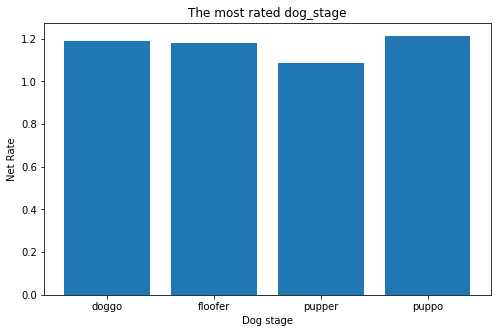

In [66]:
most_rated_stage.dropna(inplace = True)
plt.subplots(figsize=(8,5))
plt.bar(most_rated_stage.index, most_rated_stage)
plt.title('The most rated dog_stage')
plt.xlabel('Dog stage')
plt.ylabel('Net Rate')

### conclusion : "The most rated dog stage is 'puppo '"

### Insight Two & visualization

### Second question: is the highest rating dog recieves highest retweets ?

Text(0.5, 1.0, 'retweet_count by Ratings ')

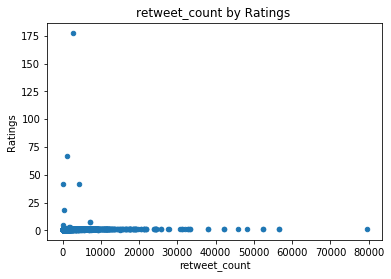

In [121]:
twitter_archive_clean.plot(x='retweet_count', y='net_rate', kind='scatter')
plt.xlabel('retweet_count')
plt.ylabel('Ratings')
plt.title('retweet_count by Ratings ')

### conclusion : "There is no relation between the rate and retweet "

### Insight Three & visualization

### Third question: is the popularity of page "we rate dogs" increased since the twitter joining data (nov,2015) ?

In [142]:
years = twitter_archive_clean.groupby('year').retweet_count.mean()
years

year
2015    1097.304348
2016    3123.785956
2017    6225.058091
Name: retweet_count, dtype: float64

Text(0, 0.5, 'average number of retweet counts')

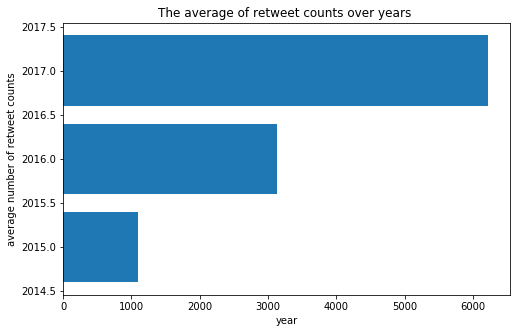

In [155]:
most_rated_stage.dropna(inplace = True)
plt.subplots(figsize=(8,5))
plt.barh(years.index, years)
plt.title('The average of retweet counts over years ')
plt.xlabel('year')
plt.ylabel('average number of retweet counts')

### conclusion : "The popularity of the page increased by three times since the foundation of the page "

### END OF NOTEBOOK "